<a href="https://colab.research.google.com/github/thap/machine-learning-finance/blob/master/notebooks/Machine_Learning_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Finance

## Mount Data from Drive

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
os.chdir('/content/drive/My Drive/data/machine_learning_finance/')
print(os.listdir())

['AAPL.csv', 'AMD.csv', 'QQQ.csv', 'SPY.csv', 'LNG.csv', 'SMLV.csv', 'ta-lib-0.4.0-src.tar.gz']


In [0]:
!cp ta-lib-0.4.0-src.tar.gz /content/

In [0]:
os.chdir('/content')

In [5]:
!ls

drive  sample_data  ta-lib-0.4.0-src.tar.gz


In [0]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

In [7]:
!ls

drive  sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [0]:
os.chdir('ta-lib')

In [0]:
!./configure --prefix=/usr

In [0]:
!make

In [0]:
!make install

In [12]:
os.chdir('..')
!ls

drive  sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [0]:
!pip install TA-Lib

In [14]:
os.chdir('/content/drive/My Drive/data/machine_learning_finance/')
print(os.listdir())

['AAPL.csv', 'AMD.csv', 'QQQ.csv', 'SPY.csv', 'LNG.csv', 'SMLV.csv', 'ta-lib-0.4.0-src.tar.gz']


## Import Data

In [0]:
import pandas as pd

In [0]:
lng = pd.read_csv('LNG.csv', index_col='Date', parse_dates=True)

In [17]:
lng = lng['2016-04-15':'2018-04-10']
lng.shape

(500, 2)

In [18]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0


In [0]:
spy = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [20]:
spy = spy['2016-04-15':'2018-04-10']
spy.shape

(500, 2)

In [21]:
spy.head()

,Adj_Close,Adj_Volume
Date,,
2016-04-15,199.760673,75761600.0
2016-04-18,201.164330,75277700.0
2016-04-19,201.798846,88316100.0
2016-04-20,201.991139,81100300.0
2016-04-21,200.904747,85695000.0


## EDA

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

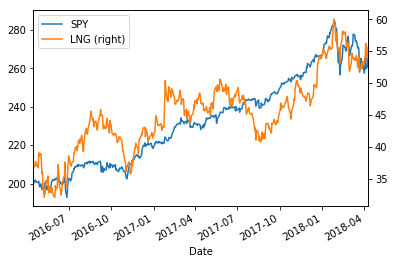

In [23]:
plt.figure()
spy['Adj_Close'].plot(label='SPY', legend=True)
lng['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()

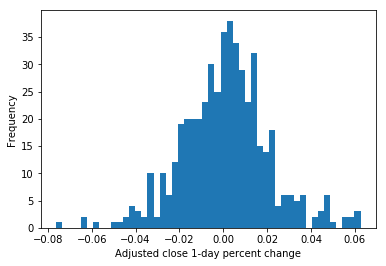

In [24]:
plt.figure()
lng['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('Adjusted close 1-day percent change')
plt.show()

## Correlations

In [0]:
lng['5d_future_close'] = lng['Adj_Close'].shift(-5)
lng['5d_close_future_pct'] = lng['5d_future_close'].pct_change(5)
lng['5d_close_pct'] = lng['Adj_Close'].pct_change(5)

In [26]:
corr = lng[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


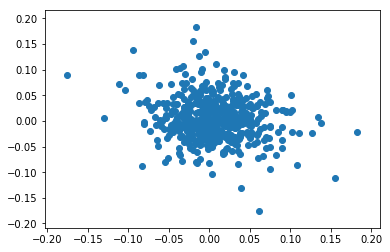

In [27]:
plt.scatter('5d_close_pct', '5d_close_future_pct', data=lng)
plt.show()

## Moving Average and RSI Features

In [0]:
import talib

In [29]:
feature_names = ['5d_close_pct']
for n in [14, 30, 50, 200]:
  lng['ma' + str(n)] = talib.SMA(lng['Adj_Close'].values, 
                                 timeperiod=n) / lng['Adj_Close']
  lng['rsi' + str(n)] = talib.RSI
  feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


In [35]:
lng.head(10)

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-18,36.90,3445852.0,36.75,NaN,NaN,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-19,37.12,3748050.0,37.25,NaN,NaN,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-20,37.77,2470384.0,39.11,NaN,NaN,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-21,37.21,2043988.0,38.62,NaN,NaN,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-22,37.40,2786757.0,38.88,0.039572,0.007272,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-25,36.75,1830397.0,38.99,0.060952,-0.004065,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-26,37.25,2384800.0,37.37,0.003221,0.003502,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>
2016-04-27,39.11,2559759.0,35.85,-0.083355,0.035478,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>,NaN,<function RSI at 0x7fd39a19d7b8>


In [36]:
lng.tail(10)

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200
Date,,,,,,,,,,,,,
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,<function RSI at 0x7fd39a19d7b8>,1.026354,<function RSI at 0x7fd39a19d7b8>,1.041368,<function RSI at 0x7fd39a19d7b8>,0.922859,<function RSI at 0x7fd39a19d7b8>
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,<function RSI at 0x7fd39a19d7b8>,1.038018,<function RSI at 0x7fd39a19d7b8>,1.055159,<function RSI at 0x7fd39a19d7b8>,0.936544,<function RSI at 0x7fd39a19d7b8>
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,<function RSI at 0x7fd39a19d7b8>,1.012735,<function RSI at 0x7fd39a19d7b8>,1.031622,<function RSI at 0x7fd39a19d7b8>,0.916875,<function RSI at 0x7fd39a19d7b8>
2018-04-02,52.99,2298339.0,54.10,0.020947,0.018843,1.002157,<function RSI at 0x7fd39a19d7b8>,1.018431,<function RSI at 0x7fd39a19d7b8>,1.039702,<function RSI at 0x7fd39a19d7b8>,0.925404,<function RSI at 0x7fd39a19d7b8>
2018-04-03,53.98,2230559.0,55.63,0.030567,0.028190,0.983883,<function RSI at 0x7fd39a19d7b8>,0.997493,<function RSI at 0x7fd39a19d7b8>,1.020085,<function RSI at 0x7fd39a19d7b8>,0.909116,<function RSI at 0x7fd39a19d7b8>
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370,0.978927,<function RSI at 0x7fd39a19d7b8>,0.989325,<function RSI at 0x7fd39a19d7b8>,1.013672,<function RSI at 0x7fd39a19d7b8>,0.904405,<function RSI at 0x7fd39a19d7b8>
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761,0.948929,<function RSI at 0x7fd39a19d7b8>,0.955399,<function RSI at 0x7fd39a19d7b8>,0.978890,<function RSI at 0x7fd39a19d7b8>,0.874433,<function RSI at 0x7fd39a19d7b8>
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025,0.981276,<function RSI at 0x7fd39a19d7b8>,0.986761,<function RSI at 0x7fd39a19d7b8>,1.010901,<function RSI at 0x7fd39a19d7b8>,0.904928,<function RSI at 0x7fd39a19d7b8>
2018-04-09,54.10,1203998.0,NaN,0.028281,0.020947,0.988117,<function RSI at 0x7fd39a19d7b8>,0.990511,<function RSI at 0x7fd39a19d7b8>,1.014026,<function RSI at 0x7fd39a19d7b8>,0.909966,<function RSI at 0x7fd39a19d7b8>


In [0]:
lng = lng.dropna()

In [0]:
features = lng[feature_names]

In [0]:
targets = lng['5d_close_future_pct']

In [0]:
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feature_and_target = lng[feature_and_target_cols]

In [41]:
feature_and_target.corr()

,5d_close_future_pct,5d_close_pct,ma14,ma30,ma50,ma200
5d_close_future_pct,1.000000,-0.041001,0.092816,0.099072,0.109859,0.227422
5d_close_pct,-0.041001,1.000000,-0.828132,-0.614245,-0.481854,-0.230115
ma14,0.092816,-0.828132,1.000000,0.850136,0.695356,0.351263
ma30,0.099072,-0.614245,0.850136,1.000000,0.926369,0.531265
ma50,0.109859,-0.481854,0.695356,0.926369,1.000000,0.696036
ma200,0.227422,-0.230115,0.351263,0.531265,0.696036,1.000000
